# ニューラルネットワーク

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

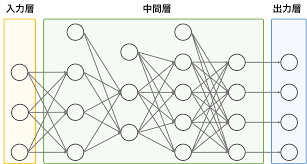

上記はニューラルネットワークを図示したもので一番左の列を入力層、一番右の列を出力層、中間の列を中間層という。

# 活性化関数

ニューラルネットワークにおける活性化関数（Activation function）とは、あるニューロンから次のニューロンへと出力する際に、あらゆる入力値を別の数値に変換して出力する関数

## シグモイド関数

シグモイド関数はネイピア数eを用いた次の数式およびグラフで表される


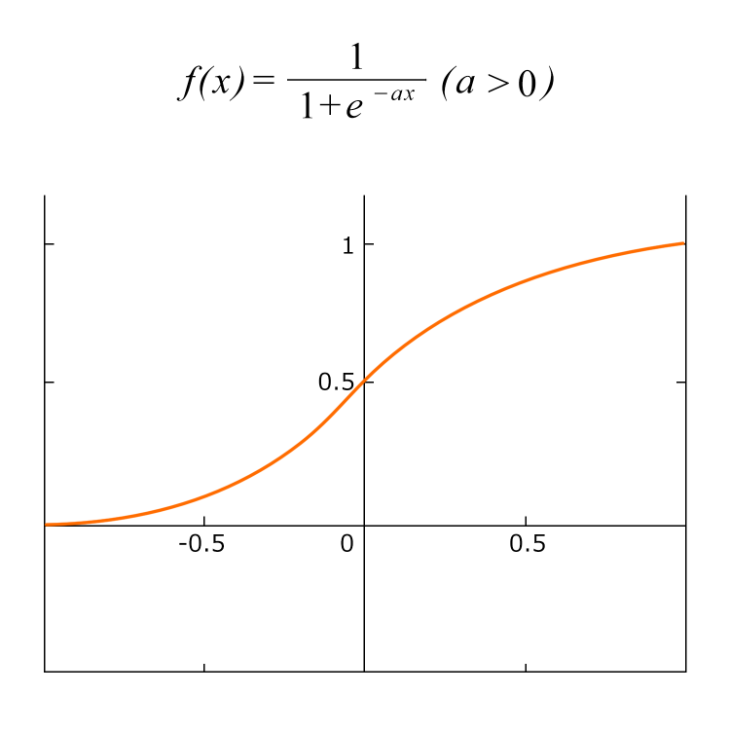

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

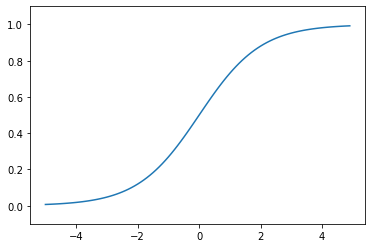

In [7]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

## ReLU関数

昔は主にシグモイド関数とステップ関数が主に用いられていたが、最近はReLU関数が用いられることが多い
0以下の入力には0を返し、0より大きい入力には入力値と同じ値を出力する

# 多次元配列の計算

In [11]:
A = np.array([[1,2],[3,4]])
B = np.array([[1,2],[5,4]])
np.dot(A, B)

array([[11, 10],
       [23, 22]])

In [12]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


# 恒等関数とソフトマックス関数

恒等関数は、入力をそのまま手を加えすに出力する関数。ソフトマックス関数は、以下の式で表される。
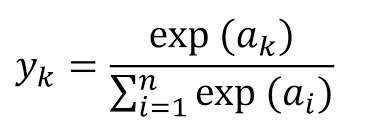

In [14]:
a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [15]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

ソフトマックス関数にはコンピュータで計算するうえでオーバーフローという問題がある。その改善案は次の式より導かれる。
$$
y_{k}=\frac{exp(a_{k})}{\sum_1^nexp(a_{i})}
        =\frac{Cexp(a_{k})}{C\sum_1^nexp(a_{i})}
        =\frac{exp(a_{k}+\log_{}{C})}{\sum_1^nexp(a_{i}+\log_{}{C})}
$$

In [20]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) #正しく計算されない


C:\Users\kouta\AppData\Local\Temp/ipykernel_3260/1599029231.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) #正しく計算されない
C:\Users\kouta\AppData\Local\Temp/ipykernel_3260/1599029231.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a)) #正しく計算されない


array([nan, nan, nan])

In [22]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [23]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

このように普通の計算ではnan(不定)であったところを入力信号の最大値を引くことで正しく計算することができていることが分かる。以上を踏まえてソフトマックス関数を実装する。

In [19]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]
